# Machine Learning: HW1 Question 2c
## 2c: MNIST k-means and k-menas++

In [156]:
#Importing necessary modules/libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import torchvision
import copy
from torchvision import datasets

In [157]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [158]:
#Reshape images into a list of 6,000 vectors in R^784
tensor_data = mnist_trainset.data.numpy()
vector_data = []
for i in range(len(tensor_data)):
    a = np.reshape(tensor_data[i], (784, 1))
    a = a/1.0
    vector_data.append(a)


k-means, k = 10 case

In [159]:
## STEP 2: Auxiliary Functions
def get_gamma(m, x):
    """
    Returns the gamma vector based on centroid vector m and all points x
    Each gamma takes a value 0, 1, or 2
    """
    N = len(x)
    k = len(m)
    gamma = np.zeros((N), dtype=int) - 1

    for i in range(N):
        min_dist_k = np.Inf
        cur_min = np.Inf
        for j in range(k):
            if np.linalg.norm(m[j] - x[i]) < cur_min:
                cur_min = np.linalg.norm(m[j] - x[i])
                min_dist_k = j    
        gamma[i] = min_dist_k

    return gamma

def get_C(x, gamma, k):
    """
    C is a list of lists where the outer index refers to which cluster and each list returns x in that cluster
    """
    N = len(gamma)
    C = []
    for i in range(k):
        cur_C = []
        for j in range(N):
            if gamma[j] == i:
                cur_C.append(x[i])
        cur_C = np.array(cur_C)
        C.append(cur_C)

    return C

def get_J(x, m, C, k):
    total = 0.0
    N = len(x)
    for i in range(k):
        cur_sum = 0.0
        cur_cluster = C[i]
        for j in range(len(cur_cluster)):
            diff_sq = np.linalg.norm(cur_cluster[j] - m[i])**2
            cur_sum = cur_sum + diff_sq
        total = total + cur_sum
    return total
        

In [175]:
x = vector_data
N = len(x)
k = 10
t = 1
J = []
#Initialize k random centroids in m
rand_images = []
for i in range(k):
    image_num = random.randint(0, 59999)
    rand_images.append(image_num)
m = []

for i in range(k):
    m.append(x[rand_images[i]])
m = np.array(m)

#Generate gamma, C, and J
gamma = get_gamma(m, x)
C = get_C(x, gamma, k)
cur_J = get_J(x, m, C, k)
J.append(cur_J)

while True:
    temp = copy.deepcopy(m)
    for j in range(k):
        sum = np.zeros((784, 1))
        for l in range(N):
            if gamma[l] == j:
                sum = sum + x[l]
        m[j] = sum*(1/len(C[j]))

    #Generate gamma, C, and J
    gamma = get_gamma(m, x)
    C = get_C(x, gamma, k)
    cur_J = get_J(x, m, C, k)
    J.append(cur_J)

    diff = 0.0
    for i in range(k):
        diff = diff + np.linalg.norm(temp[i] - m[i])
    print(diff)
    if diff < 1e-6:
        break


   


13759.774471292623
2529.554122045744
1262.6366342725682
779.4231324868362
524.1460957749978
367.3863159420333
299.84131812731994
266.2114993861653
220.5521281854035
201.39098027692708
188.1969248359132
172.89953663710205
190.7049410884888
208.49685348432638
225.05039391253467
251.17589822015375
247.25283658471218
238.16478442390365
254.05635306884872
261.76901802538544
258.2928995241752
269.6005694459778
266.07982402847415
247.05094637680017
255.84395733046287
265.4919620153328
286.9547626447724
296.54413609653506
272.3432449139788
238.70471533781802
188.38443803130068
157.0845562212782
133.0217569182322
103.4625540791317
79.59079092734187
58.4612266819953
50.93255213905475
35.460574870069365
30.04196572513172
27.500356664825965
21.627128059784205
20.866682170118608
18.122658124635326
13.709087003852437
12.538353085229938
11.856851385578725
11.932286092546422
7.701384609023104
7.16951340108323
4.693966263277406
4.806595748774049
3.7673455142490244
4.362123742578062
5.899079401229476
5.

/tmp/ipykernel_517168/3626632889.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


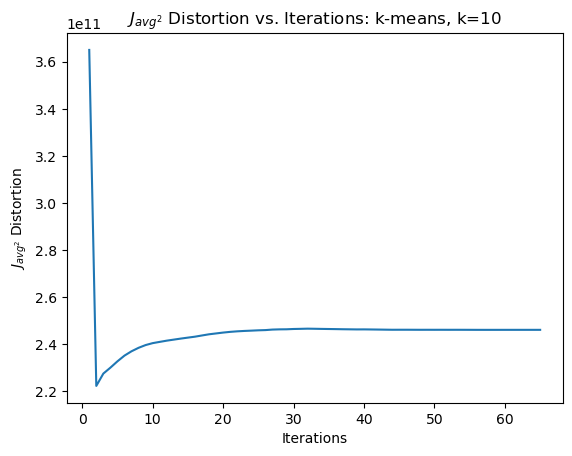

In [190]:
num_iter = len(J)
T = np.arange(num_iter) + 1
fig, ax = plt.subplots()
ax.plot(T, J)
ax.set_ylabel("$J_{avg^2}$ Distortion")
ax.set_xlabel("Iterations")
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: k-means, k=10")
fig.show()


